In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary cache directory at /scratch/tsanchez/job_40158111/matplotlib-x1tidn5u because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [57]:
df = pd.read_csv('wesad_merged_with_questionnaires.csv')

In [41]:
print(df.columns.tolist())

['subject', 'modality', 'label', 'mean', 'std', 'min', 'max', 'mode', 'median', 'age', 'height (cm)', 'weight (kg)', 'gender_male', 'gender_female', 'dominant_right', 'dominant_left', 'coffee_today', 'coffee_last_hour', 'sports_today', 'smoker', 'smoked_last_hour', 'ill_today', 'condition_id', 'condition_name', 'panas_active', 'panas_distressed', 'panas_interested', 'panas_inspired', 'panas_annoyed', 'panas_strong', 'panas_guilty', 'panas_scared', 'panas_hostile', 'panas_excited', 'panas_proud', 'panas_irritable', 'panas_enthusiastic', 'panas_ashamed', 'panas_alert', 'panas_nervous', 'panas_determined', 'panas_attentive', 'panas_jittery', 'panas_afraid', 'panas_stressed', 'panas_frustrated', 'panas_happy', 'panas_sad', 'stai_i_feel_at_ease', 'stai_i_feel_nervous', 'stai_i_am_jittery', 'stai_i_am_relaxed', 'stai_i_am_worried', 'stai_i_feel_pleasant', 'sam_valence', 'sam_arousal', 'sssq_committed_to_goals', 'sssq_wanted_to_succeed', 'sssq_motivated', 'sssq_reflected_about_self', 'sssq_wo

In [42]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print('Numerical columns\n:', numerical_cols)

categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print('\nCategorical columns:\n', categorical_cols)

# Categorical Cols with missing values 
missing_values_cols = df.isnull().sum()
print('\nCategorical columns with missing values:\n', df[categorical_cols].isnull().sum())

# Numerical Cols with missing values
print('\nNumerical columns with missing values:\n', df[numerical_cols].isnull().sum())


Numerical columns
: ['label', 'mean', 'std', 'min', 'max', 'mode', 'median', 'age', 'height (cm)', 'weight (kg)', 'gender_male', 'gender_female', 'dominant_right', 'dominant_left', 'coffee_today', 'coffee_last_hour', 'sports_today', 'smoker', 'smoked_last_hour', 'ill_today', 'condition_id', 'panas_active', 'panas_distressed', 'panas_interested', 'panas_inspired', 'panas_annoyed', 'panas_strong', 'panas_guilty', 'panas_scared', 'panas_hostile', 'panas_excited', 'panas_proud', 'panas_irritable', 'panas_enthusiastic', 'panas_ashamed', 'panas_alert', 'panas_nervous', 'panas_determined', 'panas_attentive', 'panas_jittery', 'panas_afraid', 'panas_stressed', 'panas_frustrated', 'panas_happy', 'panas_sad', 'stai_i_feel_at_ease', 'stai_i_feel_nervous', 'stai_i_am_jittery', 'stai_i_am_relaxed', 'stai_i_am_worried', 'stai_i_feel_pleasant', 'sam_valence', 'sam_arousal', 'sssq_committed_to_goals', 'sssq_wanted_to_succeed', 'sssq_motivated', 'sssq_reflected_about_self', 'sssq_worried_about_others', 

In [58]:
# Fill missing Numerical Cols with Median 
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[numerical_cols].isnull().sum()

df.to_csv('wesad_with_questionnaires_preprocessed.csv', index=False)

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
# XGBoost

df = pd.read_csv('wesad_with_questionnaires_preprocessed.csv')
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print('Numerical columns\n:', numerical_cols)

categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
print('\nCategorical columns:\n', categorical_cols)

# separate data
target_col = 'label'
non_feature_cols = ['label', 'subject', 'modality', 'condition_name', 'condition_id']

feature_cols = [col for col in df.columns if col not in non_feature_cols]

# features and label for model
X = df[feature_cols]
y = df[target_col] 

# 0-based indexing labels: xgboost
y = y - 1

# split data: train + test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# XGBoost classifier
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_alpha=0.01,
    reg_lambda=2.0,
    objective='multi:softmax',
    num_class=len(y.unique()),
    random_state=42,
    n_jobs=-1,
    tree_method='hist')

# fit/train model 
xgb.fit(X_train, y_train)

# evaluate on training data/test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)


Numerical columns
: ['label', 'mean', 'std', 'min', 'max', 'mode', 'median', 'age', 'height (cm)', 'weight (kg)', 'gender_male', 'gender_female', 'dominant_right', 'dominant_left', 'coffee_today', 'coffee_last_hour', 'sports_today', 'smoker', 'smoked_last_hour', 'ill_today', 'condition_id', 'panas_active', 'panas_distressed', 'panas_interested', 'panas_inspired', 'panas_annoyed', 'panas_strong', 'panas_guilty', 'panas_scared', 'panas_hostile', 'panas_excited', 'panas_proud', 'panas_irritable', 'panas_enthusiastic', 'panas_ashamed', 'panas_alert', 'panas_nervous', 'panas_determined', 'panas_attentive', 'panas_jittery', 'panas_afraid', 'panas_stressed', 'panas_frustrated', 'panas_happy', 'panas_sad', 'stai_i_feel_at_ease', 'stai_i_feel_nervous', 'stai_i_am_jittery', 'stai_i_am_relaxed', 'stai_i_am_worried', 'stai_i_feel_pleasant', 'sam_valence', 'sam_arousal', 'sssq_committed_to_goals', 'sssq_wanted_to_succeed', 'sssq_motivated', 'sssq_reflected_about_self', 'sssq_worried_about_others', 

In [5]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    xgb,
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

# Calculate mean and std for plotting
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

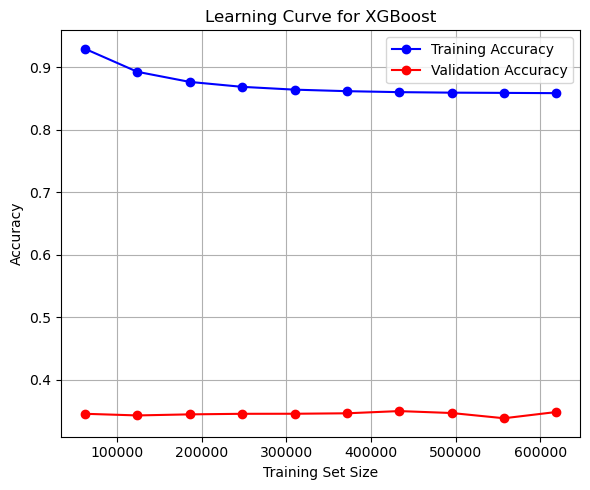

In [6]:
# Plot
plt.figure(figsize=(6,5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')

plt.title('Learning Curve for XGBoost')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.savefig("figures/xgboost_learning_curve.png", dpi=300, bbox_inches='tight')
plt.show()

In [69]:
import os
os.makedirs("figures", exist_ok=True)

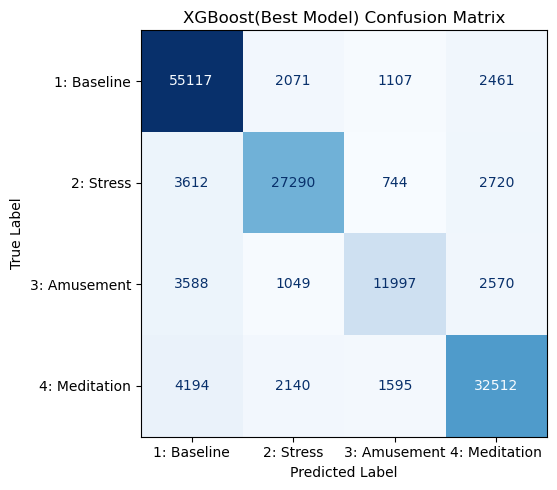

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)

class_names = ['1: Baseline', '2: Stress', '3: Amusement', '4: Meditation']

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(6,5))
display.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title('XGBoost(Best Model) Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig("figures/xgboost_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


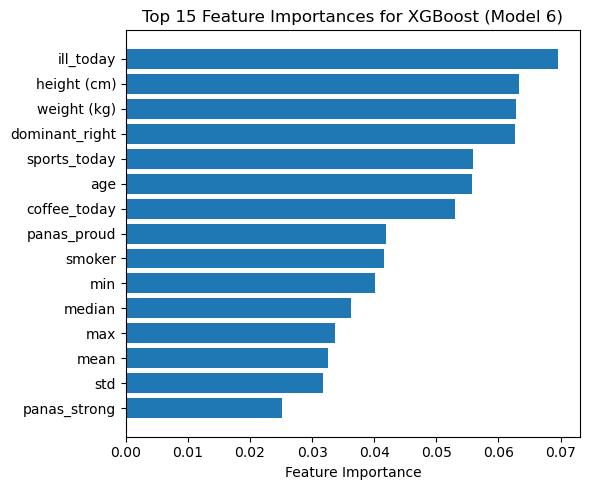

In [9]:
# feature importance plot 

importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
n = 15

top_features = [feature_cols[i] for i in indices[:n]]
top_importances = importances[indices[:n]]

plt.figure(figsize=(6, 5))
plt.barh(range(n), top_importances[::-1], align='center')
plt.yticks(range(n), [top_features[i] for i in range(n-1, -1, -1)])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances for XGBoost (Model 6)')
plt.tight_layout()
plt.savefig('figures/xgboost_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

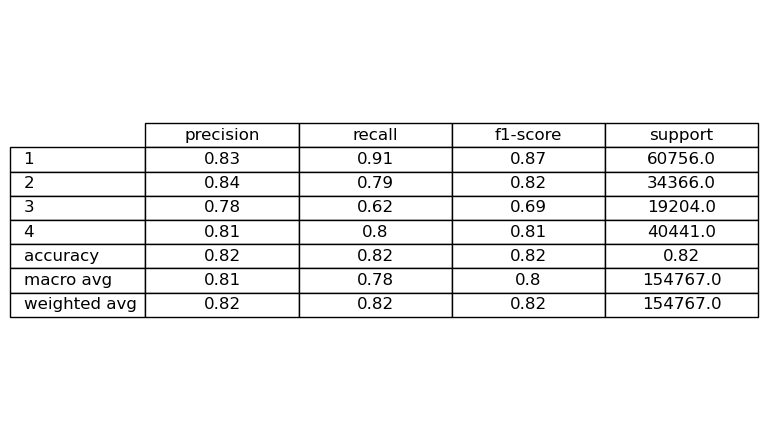

In [13]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Add 1 to both to map from 0,1,2,3 --> 1,2,3,4
y_test_mapped = y_test + 1
y_test_pred_mapped = y_test_pred + 1

# Generate classification report as dict, specify labels to ensure correct order
labels = [1, 2, 3, 4]
target_names = [str(i) for i in labels]
report_dict = classification_report(
    y_test_mapped, y_test_pred_mapped,
    labels=labels,
    target_names=target_names,
    output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose().round(2)

# Plot as a table (no title in image; only axis off)
fig, ax = plt.subplots(figsize=(8, len(report_df)*0.5 + 1))
ax.axis('off')
tbl = ax.table(
    cellText=report_df.values,
    colLabels=report_df.columns,
    rowLabels=report_df.index,
    loc='center',
    cellLoc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

plt.tight_layout()
plt.savefig('figures/model6_xgboost_classification_report.png', dpi=300, bbox_inches='tight')
plt.show()

## Comparing All Multiclass Models' Accuracy Score (Test Data)
---

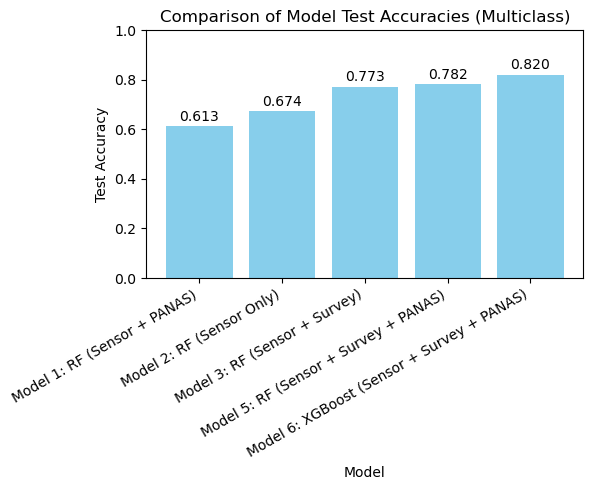

In [17]:
# all models comparison:
import matplotlib.pyplot as plt

# Model names and accuracies (excluding the binary model)
model_names = [
    "Model 1: RF (Sensor + PANAS)",
    "Model 2: RF (Sensor Only)",
    "Model 3: RF (Sensor + Survey)",
    "Model 5: RF (Sensor + Survey + PANAS)",
    "Model 6: XGBoost (Sensor + Survey + PANAS)"
]

accuracies = [0.613, 0.674, 0.773, 0.7821, 0.82]

plt.figure(figsize=(6, 5))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.xlabel("Model")
plt.title("Comparison of Model Test Accuracies (Multiclass)")
plt.xticks(rotation=30, ha='right')

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()